<a href="https://colab.research.google.com/github/GloyseC/HandWritten-Digit-Recognition/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

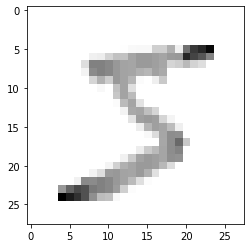

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
print(x_train[0])

In [ ]:
IMG_SIZE = 28

x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= x_trainr.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=  5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 87s 65ms/step - loss: 0.3152 - accuracy: 0.9008 - val_loss: 0.1442 - val_accuracy: 0.9565
Epoch 2/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.1014 - accuracy: 0.9686 - val_loss: 0.0913 - val_accuracy: 0.9721
Epoch 3/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 4/5
1313/1313 [==============================] - 83s 64ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 5/5
1313/1313 [==============================] - 85s 65ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0619 - val_accuracy: 0.9818


In [ ]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0542 - accuracy: 0.9829
0.05419335141777992
0.9829000234603882


In [ ]:
predictions = model.predict([x_testr])

313/313 [==============================] - 5s 16ms/step


In [ ]:
print(predictions)

[[4.1471171e-07 1.7811381e-04 8.3868799e-05 ... 9.9970853e-01
  3.7814888e-07 2.3444827e-05]
 [7.8795647e-06 2.0611644e-08 9.9995893e-01 ... 8.5121337e-06
  5.9438212e-06 6.2480177e-07]
 [2.6093199e-05 9.9941838e-01 7.7722952e-06 ... 6.9531518e-05
  6.3016264e-06 9.3339397e-05]
 ...
 [1.8790535e-08 1.5650277e-05 5.7868186e-07 ... 1.2008803e-05
  8.7229027e-06 3.5516085e-05]
 [3.0702438e-06 5.1756735e-05 2.7631835e-08 ... 1.0800297e-06
  1.0301817e-03 1.9242855e-06]
 [1.1062298e-05 9.7364511e-07 3.2211839e-05 ... 6.6812774e-08
  6.9611691e-05 1.1255540e-05]]


In [ ]:
print(np.argmax(predictions[0]))

7


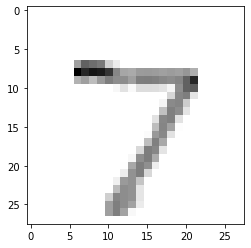

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
print(np.argmax(predictions[69]))

0


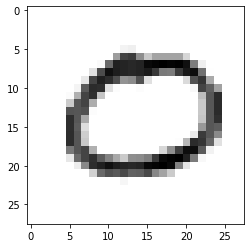

In [ ]:
plt.imshow(x_test[69], cmap = plt.)